# **Assessment for DE Internship at DataGrokr**
## The objective of the assignment is to test your proficiency in coding and data analysis skills. The assignment has 3 parts.
1.   Environment setup and Data Cleaning
2.   Data Analysis
3.   Exposing results in API

# **Section 1: Environment setup and data cleaning**

In [3]:
# mount google drive to use content from it

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sqlite3
import pandas as pd

file_path = '/content/drive/My Drive/DE_SOLUTION_Neelam_Deka/HousingDataset.csv'
housing_dataset = pd.read_csv(file_path, engine='python')

In [5]:
housing_dataset.shape                                                           # 500027 rows and 26 columns before cleaning

(500027, 26)

In [6]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500027 entries, 0 to 500026
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       500027 non-null  object 
 1   id               500027 non-null  object 
 2   ad_type          500027 non-null  object 
 3   start_date       500000 non-null  object 
 4   end_date         500000 non-null  object 
 5   created_on       500000 non-null  object 
 6   lat              424515 non-null  float64
 7   lon              424065 non-null  float64
 8   l1               500000 non-null  object 
 9   l2               500000 non-null  object 
 10  l3               473344 non-null  object 
 11  l4               119679 non-null  object 
 12  l5               2498 non-null    object 
 13  l6               0 non-null       float64
 14  rooms            262826 non-null  float64
 15  bedrooms         232669 non-null  float64
 16  bathrooms        388149 non-null  floa

In [7]:
drop_cols = ['ad_type', 'title', 'description', 'l4', 'l5', 'l6']
housing_dataset.drop(columns=drop_cols, axis=1, inplace=True)

housing_dataset.head()

,Unnamed: 0,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
0,107397,YhXDVa/KIlF7EjJMulHiyA==,2020-03-26,2020-04-08,2020-03-26,-34.562465,-58.465079,Argentina,Capital Federal,Belgrano,3.0,2.0,2.0,NaN,NaN,220000.0,USD,NaN,Departamento,Venta
1,918839,jHxD7psAg4+AC07T3sognw==,2020-03-08,2020-03-09,2020-03-08,-37.999235,-57.553724,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,1.0,NaN,NaN,155000.0,USD,NaN,Otro,Venta
2,204435,IYPdaIGi5Obo4eLzwUY+LA==,2020-10-26,2021-02-03,2020-10-26,-34.453307,-58.649410,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,3.0,3.0,900.0,310.0,480000.0,USD,Mensual,Casa,Venta
3,699972,Cc8bVzOhRcPnAYS++8oyMg==,2020-01-07,2020-01-07,2020-01-07,-31.635173,-60.716072,Argentina,Santa Fe,NaN,4.0,3.0,4.0,NaN,NaN,34000.0,ARS,Mensual,Casa,Alquiler
4,66130,83DDzQ7686eLxOi9sQNJVA==,2020-05-13,2020-05-17,2020-05-13,NaN,NaN,Argentina,Santa Fe,Rosario,9.0,9.0,2.0,200.0,200.0,20000.0,ARS,NaN,Casa,Alquiler


In [8]:
remove_null_rows = ['lon', 'lat', 'price_period', 'bedrooms', 'surface_total', 'rooms', 'price', 'surface_covered']
housing_dataset.dropna(subset=remove_null_rows, inplace=True)

housing_dataset.head()

,Unnamed: 0,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
15,697094,5Be4XjP4b1Olk02vXOHLqA==,2020-07-31,2020-08-28,2020-07-31,-34.557563,-58.442389,Argentina,Capital Federal,Belgrano,4.0,3.0,4.0,155.0,150.0,195000.0,ARS,Mensual,Departamento,Alquiler
27,440248,V+6946R1DSniL3DToznOBw==,2020-12-16,2020-12-17,2020-12-16,-34.602959,-58.462030,Argentina,Capital Federal,Paternal,4.0,3.0,3.0,181.0,181.0,235000.0,USD,Mensual,PH,Venta
99,924602,w0i2gQ7n18T4QYlI3gHjtg==,2021-01-05,9999-12-31,2021-01-05,-34.579070,-58.403829,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,230.0,211.0,2500.0,USD,Mensual,Departamento,Alquiler
112,48736,+FVdVVYFmNvza0tOpXfi/A==,2020-06-04,2020-06-25,2020-06-04,-34.797896,-58.385961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,3.0,2.0,2.0,70.0,65.0,195000.0,USD,Mensual,Departamento,Venta
123,558098,Fg4t539n8vLsWIEQbZ4yPw==,2020-10-22,2020-10-31,2020-10-22,-34.599525,-58.403537,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,40.0,36.0,89999.0,USD,Mensual,Departamento,Venta


In [9]:
housing_dataset.shape   # 43436 rows and 20 columns after cleaning

(43436, 20)

In [10]:
# diving dataset into 2 different dataframes

property_details = housing_dataset[['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
property_price_details = housing_dataset[['id', 'price', 'currency', 'price_period', 'property_type', 'operation_type']]

In [11]:
# connecting to sqlite database and making 2 tables

sqlite_conn = sqlite3.connect('housing.db')
property_details.to_sql(name='property_details', con=sqlite_conn, if_exists='replace', index=False)
property_price_details.to_sql(name='property_price_details', con=sqlite_conn, if_exists='replace', index=False)
sqlite_conn.close()

In [12]:
# connecting to database and displaying data

sqlite_conn = sqlite3.connect('housing.db')
property_details_data = pd.read_sql_query('SELECT * FROM property_details', sqlite_conn)
property_price_details_data = pd.read_sql_query('SELECT * FROM property_price_details', sqlite_conn)

In [13]:
property_details_data.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,5Be4XjP4b1Olk02vXOHLqA==,2020-07-31,2020-08-28,2020-07-31,-34.557563,-58.442389,Argentina,Capital Federal,Belgrano,4.0,3.0,4.0,155.0,150.0
1,V+6946R1DSniL3DToznOBw==,2020-12-16,2020-12-17,2020-12-16,-34.602959,-58.462030,Argentina,Capital Federal,Paternal,4.0,3.0,3.0,181.0,181.0
2,w0i2gQ7n18T4QYlI3gHjtg==,2021-01-05,9999-12-31,2021-01-05,-34.579070,-58.403829,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,230.0,211.0
3,+FVdVVYFmNvza0tOpXfi/A==,2020-06-04,2020-06-25,2020-06-04,-34.797896,-58.385961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,3.0,2.0,2.0,70.0,65.0
4,Fg4t539n8vLsWIEQbZ4yPw==,2020-10-22,2020-10-31,2020-10-22,-34.599525,-58.403537,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,40.0,36.0


In [14]:
property_price_details_data.head()

,id,price,currency,price_period,property_type,operation_type
0,5Be4XjP4b1Olk02vXOHLqA==,195000.0,ARS,Mensual,Departamento,Alquiler
1,V+6946R1DSniL3DToznOBw==,235000.0,USD,Mensual,PH,Venta
2,w0i2gQ7n18T4QYlI3gHjtg==,2500.0,USD,Mensual,Departamento,Alquiler
3,+FVdVVYFmNvza0tOpXfi/A==,195000.0,USD,Mensual,Departamento,Venta
4,Fg4t539n8vLsWIEQbZ4yPw==,89999.0,USD,Mensual,Departamento,Venta


In [15]:
sqlite_conn.close()

# **Section 2: Data Analysis**

In [16]:
sqlite_conn = sqlite3.connect('housing.db')

# creating indexes to load data faster

create_index_query = """
CREATE INDEX idx_bedrooms ON Property_Details (bedrooms);
CREATE INDEX idx_bathrooms ON Property_Details (bathrooms);
CREATE INDEX idx_l3 ON Property_Details (l3);
"""

sqlite_conn.executescript(create_index_query)

### using the database to 'housing.db' to fetch results as asked and displaying them accordingly

In [17]:
query1 = """
SELECT * FROM property_details
WHERE id IN (
    SELECT id
    FROM property_price_details
    WHERE price > 1000000
)
AND l1 = 'Estados Unidos';
"""

filtered_properties = pd.read_sql_query(query1, sqlite_conn)
filtered_properties.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,jia0r061K3bw5GPCHag4/Q==,2020-10-26,9999-12-31,2020-10-26,25.764355,-80.193021,Estados Unidos,Florida,None,2.0,1.0,1.0,87.0,87.0
1,swvA3wM1Df6lwOBx4ciKJg==,2020-09-15,9999-12-31,2020-09-15,25.887595,-80.131156,Estados Unidos,Florida,None,3.0,2.0,2.0,242.0,168.0
2,4tMKIwmJObpzvXuT/fFPnQ==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,9.0,3.0,5.0,373.0,283.0
3,7Aa4z2SWO2mp+P/JXdTmsA==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,9.0,4.0,5.0,530.0,385.0
4,fAv1rqL0LHZOiqDaDNwrzA==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,5.0,2.0,2.0,206.0,123.0


In [18]:
query2 = """
SELECT *,
    CASE
        WHEN surface_total < 50 THEN 'Small'
        WHEN surface_total BETWEEN 50 AND 100 THEN 'Medium'
        ELSE 'Large'
    END AS surface_total_category
FROM property_details;
"""

categorized_properties = pd.read_sql_query(query2, sqlite_conn)
categorized_properties.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,surface_total_category
0,5Be4XjP4b1Olk02vXOHLqA==,2020-07-31,2020-08-28,2020-07-31,-34.557563,-58.442389,Argentina,Capital Federal,Belgrano,4.0,3.0,4.0,155.0,150.0,Large
1,V+6946R1DSniL3DToznOBw==,2020-12-16,2020-12-17,2020-12-16,-34.602959,-58.462030,Argentina,Capital Federal,Paternal,4.0,3.0,3.0,181.0,181.0,Large
2,w0i2gQ7n18T4QYlI3gHjtg==,2021-01-05,9999-12-31,2021-01-05,-34.579070,-58.403829,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,230.0,211.0,Large
3,+FVdVVYFmNvza0tOpXfi/A==,2020-06-04,2020-06-25,2020-06-04,-34.797896,-58.385961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,3.0,2.0,2.0,70.0,65.0,Medium
4,Fg4t539n8vLsWIEQbZ4yPw==,2020-10-22,2020-10-31,2020-10-22,-34.599525,-58.403537,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,40.0,36.0,Small


In [19]:
query3 = """
SELECT pd.id
FROM property_details pd
WHERE pd.l3 = 'Belgrano'
AND EXISTS (
    SELECT 1
    FROM property_details ppd
    WHERE pd.bedrooms = ppd.bedrooms
    AND pd.bathrooms = ppd.bathrooms
    AND pd.id <> ppd.id
);
"""

matching_properties = pd.read_sql_query(query3, sqlite_conn)
matching_properties.head()

,id
0,5Be4XjP4b1Olk02vXOHLqA==
1,F+GF0xxgEoQ8FHaSUbPxfQ==
2,3l0RfMrJh4v53riOmSUgVQ==
3,kU5f32VoLFhgCXHoj42S/A==
4,I5Qis31CnRAmOOYrS28M/Q==


In [20]:
query4 = """
SELECT ppd.property_type, AVG(ppd.price / pd.surface_total) AS avg_price_per_sqm
FROM property_details pd
INNER JOIN property_price_details ppd ON pd.id = ppd.id
WHERE l3 = 'Belgrano'
GROUP BY property_type;
"""

avg_price = pd.read_sql_query(query4, sqlite_conn)
avg_price

,property_type,avg_price_per_sqm
0,Casa,2146.914530
1,Departamento,2560.767096
2,Local comercial,1986.436629
3,Lote,2697.921913
4,Oficina,1895.035734
5,PH,1955.004266


In [21]:
query5 = """
WITH AvgPriceByBedBath AS (
    SELECT bedrooms, bathrooms, AVG(price) AS avg_price
    FROM Property_Details pd
    INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
    GROUP BY bedrooms, bathrooms
)
SELECT pd.id, pd.l1, pd.l2, pd.l3, pd.rooms, pd.surface_total, pd.surface_covered, ppd.price
FROM Property_Details pd
INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
INNER JOIN AvgPriceByBedBath avg ON pd.bedrooms = avg.bedrooms AND pd.bathrooms = avg.bathrooms
WHERE ppd.price > avg.avg_price;
"""

high_price_prop = pd.read_sql_query(query5, sqlite_conn)
high_price_prop.head()

,id,l1,l2,l3,rooms,surface_total,surface_covered,price
0,eHozoAsySh4plT4G4o7ZAw==,Estados Unidos,Florida,None,2.0,58.0,58.0,360000.0
1,c60eO1esSQFLM2X1vQaXlg==,Argentina,Capital Federal,Recoleta,1.0,52.0,47.0,262000.0
2,3pYYkhTe9FQbflza7C9EnQ==,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,63.0,50.0,8228766.0
3,QbZ7RsqO5WEFBHTejLDW5w==,Argentina,Córdoba,Córdoba,2.0,47.0,45.0,2900000.0
4,UQTmPRIR7RZc7Rb9Wkx1QQ==,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,51.0,44.0,13247181.0


In [22]:
query6 = """
SELECT
    ppd.property_type,
    pd.created_on,
    ppd.price,
    SUM(ppd.price) OVER (PARTITION BY ppd.property_type ORDER BY pd.created_on) AS cumulative_price
FROM Property_Details pd
INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id;
"""

cum_prices = pd.read_sql_query(query6, sqlite_conn)
cum_prices.head(20)

,property_type,created_on,price,cumulative_price
0,Casa,2020-01-08,75000.0,75000.0
1,Casa,2020-01-16,45000.0,1313000.0
2,Casa,2020-01-16,50000.0,1313000.0
3,Casa,2020-01-16,180000.0,1313000.0
4,Casa,2020-01-16,65000.0,1313000.0
5,Casa,2020-01-16,69000.0,1313000.0
6,Casa,2020-01-16,79000.0,1313000.0
7,Casa,2020-01-16,130000.0,1313000.0
8,Casa,2020-01-16,55000.0,1313000.0
9,Casa,2020-01-16,160000.0,1313000.0


In [23]:
query7 = """
SELECT l3, SUM(surface_total) AS total_surface_area
FROM Property_Details pd
INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
WHERE ppd.operation_type = 'Venta'
GROUP BY l3
ORDER BY total_surface_area DESC
LIMIT 10;
"""

top_10_area = pd.read_sql_query(query7, sqlite_conn)
top_10_area

,l3,total_surface_area
0,Tigre,454465.0
1,Rosario,331595.0
2,Palermo,249909.0
3,Pilar,214308.0
4,Belgrano,213462.0
5,San Isidro,175462.0
6,Villa Urquiza,171980.0
7,La Plata,168131.0
8,Vicente López,145303.0
9,Escobar,138415.0


In [24]:
query8 = """
SELECT pd.*, ppd.price
FROM Property_Details pd
INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
WHERE pd.l3 = 'Palermo'
AND strftime('%Y-%m', pd.created_on) = '2020-08'
ORDER BY ppd.price DESC
LIMIT 5;
"""

top_5_expensive = pd.read_sql_query(query8, sqlite_conn)
top_5_expensive

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,USMCY74tSt/w7kt5ACB1lQ==,2020-08-30,2020-09-04,2020-08-30,-34.575167,-58.421444,Argentina,Capital Federal,Palermo,5.0,3.0,4.0,392.0,377.0,4000000.0
1,dM8I+dJjssyb8HvbbBnCHw==,2020-08-11,2020-08-18,2020-08-11,-34.566286,-58.434891,Argentina,Capital Federal,Palermo,4.0,3.0,4.0,390.0,350.0,1980000.0
2,KXKexQ3CiqHowcWRBmaxYQ==,2020-08-08,2020-08-20,2020-08-08,-34.573079,-58.419203,Argentina,Capital Federal,Palermo,6.0,4.0,3.0,327.0,300.0,1650000.0
3,JbwB3v6R0C4rW97pcK4hIw==,2020-08-13,2020-10-25,2020-08-13,-34.586025,-58.408724,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,245.0,221.0,1350000.0
4,nujZFNyu/t93+/ZigbmzLA==,2020-08-22,2020-09-04,2020-08-22,-34.566071,-58.434849,Argentina,Capital Federal,Palermo,4.0,4.0,3.0,202.0,180.0,1349000.0


In [25]:
query9 = """
WITH RankedProperties AS (
    SELECT
        pd.*, ppd.*,
        ppd.price / pd.surface_total AS price_per_sqm,
        ROW_NUMBER() OVER (PARTITION BY ppd.property_type ORDER BY ppd.price / pd.surface_total DESC) AS rank
    FROM Property_Details pd
    INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
)
SELECT
    property_type,
    id,
    price,
    surface_total,
    price_per_sqm,
    rank
FROM RankedProperties
WHERE rank <= 3;
"""

top_3_prop_per_type = pd.read_sql_query(query9, sqlite_conn)
top_3_prop_per_type

,property_type,id,price,surface_total,price_per_sqm,rank
0,Casa,4uEUcuIO6yA9ZD4PBAXjVw==,36400000.0,131.0,277862.595420,1
1,Casa,PowAluD2jcoKjBuOE8eALw==,22809690.0,115.0,198345.130435,2
2,Casa,ujrbSEDO6JqQ3boPSGuc2A==,13600000.0,70.0,194285.714286,3
3,Casa de campo,L/hHlfmnL44avxcBKaEdFA==,390000.0,1537.0,253.741054,1
4,Casa de campo,lkb1/y0lWTtuynnIXk/3vQ==,399000.0,2540.0,157.086614,2
5,Casa de campo,Y/zwWcn7uOycF+zPMv3+0Q==,67000.0,2934.0,22.835719,3
6,Cochera,27nCoOot/g4/EZwFNwplUQ==,65000.0,52.0,1250.000000,1
7,Cochera,HXIedfxrdJkcwDVkQeRi4Q==,15000.0,71.0,211.267606,2
8,Cochera,A3oPmqYgyU2m8Keaxn5lRw==,14000.0,71.0,197.183099,3
9,Departamento,shQ41FdOdKIxclSV+DrQ5Q==,70550000.0,126.0,559920.634921,1


In [26]:
query10 = """
WITH FilteredProperties AS (
    SELECT
        pd.l1,
        pd.l2,
        pd.l3,
        ppd.price / pd.surface_total AS price_per_sqm
    FROM Property_Details pd
    INNER JOIN Property_Price_Details ppd ON pd.id = ppd.id
    WHERE ppd.operation_type = 'Venta'
    AND strftime('%Y', pd.created_on) = '2020'
)
, LocationStats AS (
    SELECT
        l1,
        l2,
        l3,
        AVG(price_per_sqm) AS avg_price_per_sqm,
        COUNT(*) AS property_count
    FROM FilteredProperties
    GROUP BY l1, l2, l3
    HAVING property_count >= 10
)
SELECT
    l1,
    l2,
    l3,
    avg_price_per_sqm
FROM LocationStats
ORDER BY avg_price_per_sqm DESC
LIMIT 3;
"""

top_3_locations = pd.read_sql_query(query10, sqlite_conn)
top_3_locations

,l1,l2,l3,avg_price_per_sqm
0,Argentina,Santa Fe,San Lorenzo,32729.571284
1,Argentina,Tucumán,San Miguel de Tucumán,24963.582022
2,Argentina,Neuquén,Confluencia,23968.471396


In [27]:
sqlite_conn.close()

# Section 3: Expose the results in **API**

In [28]:
!pip install flask-ngrok                                                        # installing flask-ngrok to run server on a public domain

from flask import Flask, jsonify, render_template_string, request
from flask_ngrok import run_with_ngrok
import threading
import json                                                                     # importing json to deserialize data
import os
import signal

app = Flask(__name__)
run_with_ngrok(app)

In [29]:
# html template for the welcome page

html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>Welcome to My App</title>
</head>
<body>
    <h1>Welcome to My App</h1>
    <h2>Click on links below to navigate:</h2>
    <ul>
        {% for link in question_links %}
            <li><a href="{{ link.link }}">{{ link.question }}</a></li>
        {% endfor %}
    </ul>
</body>
</html>
"""

### using flask methods to retrieve data from sql database and displaying on server

In [30]:
@app.route('/')
def welcome():
    try:
        question_links = [
            {"question": "Question 1", "link": "/question-1"},
            {"question": "Question 2", "link": "/question-2"},
            {"question": "Question 3", "link": "/question-3"},
            {"question": "Question 4", "link": "/question-4"},
            {"question": "Question 5", "link": "/question-5"},
            {"question": "Question 6", "link": "/question-6"},
            {"question": "Question 7", "link": "/question-7"},
            {"question": "Question 8", "link": "/question-8"},
            {"question": "Question 9", "link": "/question-9"},
            {"question": "Question 10", "link": "/question-10"},
            ]
        return render_template_string(html_template, question_links=question_links)
    except Exception as e:
        return jsonify({"error": str(e)}), 500

In [31]:
@app.route('/question-1', methods=['GET'])
def question_1():
    try:
        result = filtered_properties.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [32]:
@app.route('/question-2', methods=['GET'])
def question_2():
    try:
        limit = int(request.args.get('limit', 100))                             # putting a limit to the output as dataset is very big
        result = categorized_properties.head(limit).to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [33]:
@app.route('/question-3', methods=['GET'])
def question_3():
    try:
        result = matching_properties.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [34]:
@app.route('/question-4', methods=['GET'])
def question_4():
    try:
        result = avg_price.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [35]:
@app.route('/question-5', methods=['GET'])
def question_5():
    try:
        result = high_price_prop.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [36]:
@app.route('/question-6', methods=['GET'])
def question_6():
    try:
        limit = int(request.args.get('limit', 100))                             # putting a limit to the output as dataset is very big
        result = cum_prices.head(limit).to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [37]:
@app.route('/question-7', methods=['GET'])
def question_7():
    try:
        result = top_10_area.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [38]:
@app.route('/question-8', methods=['GET'])
def question_8():
    try:
        result = top_5_expensive.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [39]:
@app.route('/question-9', methods=['GET'])
def question_9():
    try:
        result = top_3_prop_per_type.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [40]:
@app.route('/question-10', methods=['GET'])
def question_10():
    try:
        result = top_3_locations.to_json(orient='records', indent=4)
        return jsonify({"result": json.loads(result)})
    except Exception as e:
        return jsonify({"error": str(e)})

In [41]:
@app.errorhandler(404)
def not_found(error):
    return jsonify({"error": "Invalid Question Number"}), 404

@app.errorhandler(Exception)
def handle_error(error):
    return jsonify({"error": "An unexpected error occurred"}), 500

In [42]:
# installing pyngrok to host on public server and authenticating ngrok server

!pip install pyngrok

from pyngrok import ngrok

!ngrok authtoken 2VvM2uIpsn9U0oydx5Fp53k3NPQ_5BpxdETzuSq1Ar3xUP5iP

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [43]:
def run_flask_app():
    app.config['ENV'] = 'development'
    try:
        app.run()
    except Exception as e:
        print("An error occurred while starting the app:", str(e))

if __name__ == '__main__':
    # Start the Flask app in a separate thread
    flask_thread = threading.Thread(target=run_flask_app)
    flask_thread.start()

    # Expose Flask app to a public URL using ngrok
    public_url = ngrok.connect(addr='5000')
    print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, '5000'))

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * ngrok tunnel "NgrokTunnel: "https://acb3-34-148-15-43.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"


## Curl commands to check the app running on local server

In [52]:
!curl http://127.0.0.1:5000/question-1
!curl http://127.0.0.1:5000/question-2
!curl http://127.0.0.1:5000/question-3
!curl http://127.0.0.1:5000/question-4
!curl http://127.0.0.1:5000/question-5
!curl http://127.0.0.1:5000/question-6
!curl http://127.0.0.1:5000/question-7
!curl http://127.0.0.1:5000/question-8
!curl http://127.0.0.1:5000/question-9
!curl http://127.0.0.1:5000/question-10

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:02] "GET /question-1 HTTP/1.1" 200 -


{"result":[{"bathrooms":1.0,"bedrooms":1.0,"created_on":"2020-10-26","end_date":"9999-12-31","id":"jia0r061K3bw5GPCHag4/Q==","l1":"Estados Unidos","l2":"Florida","l3":null,"lat":25.7643553,"lon":-80.1930205,"rooms":2.0,"start_date":"2020-10-26","surface_covered":87.0,"surface_total":87.0},{"bathrooms":2.0,"bedrooms":2.0,"created_on":"2020-09-15","end_date":"9999-12-31","id":"swvA3wM1Df6lwOBx4ciKJg==","l1":"Estados Unidos","l2":"Florida","l3":null,"lat":25.8875948,"lon":-80.1311564,"rooms":3.0,"start_date":"2020-09-15","surface_covered":168.0,"surface_total":242.0},{"bathrooms":5.0,"bedrooms":3.0,"created_on":"2020-03-04","end_date":"2020-10-16","id":"4tMKIwmJObpzvXuT/fFPnQ==","l1":"Estados Unidos","l2":"Florida","l3":null,"lat":25.9519943,"lon":-80.11997,"rooms":9.0,"start_date":"2020-03-04","surface_covered":283.0,"surface_total":373.0},{"bathrooms":5.0,"bedrooms":4.0,"created_on":"2020-03-04","end_date":"2020-10-16","id":"7Aa4z2SWO2mp+P/JXdTmsA==","l1":"Estados Unidos","l2":"Florida"

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:02] "GET /question-2 HTTP/1.1" 200 -


{"result":[{"bathrooms":4.0,"bedrooms":3.0,"created_on":"2020-07-31","end_date":"2020-08-28","id":"5Be4XjP4b1Olk02vXOHLqA==","l1":"Argentina","l2":"Capital Federal","l3":"Belgrano","lat":-34.5575633,"lon":-58.4423887,"rooms":4.0,"start_date":"2020-07-31","surface_covered":150.0,"surface_total":155.0,"surface_total_category":"Large"},{"bathrooms":3.0,"bedrooms":3.0,"created_on":"2020-12-16","end_date":"2020-12-17","id":"V+6946R1DSniL3DToznOBw==","l1":"Argentina","l2":"Capital Federal","l3":"Paternal","lat":-34.602959,"lon":-58.46203,"rooms":4.0,"start_date":"2020-12-16","surface_covered":181.0,"surface_total":181.0,"surface_total_category":"Large"},{"bathrooms":2.0,"bedrooms":2.0,"created_on":"2021-01-05","end_date":"9999-12-31","id":"w0i2gQ7n18T4QYlI3gHjtg==","l1":"Argentina","l2":"Capital Federal","l3":"Palermo","lat":-34.5790704,"lon":-58.403829,"rooms":4.0,"start_date":"2021-01-05","surface_covered":211.0,"surface_total":230.0,"surface_total_category":"Large"},{"bathrooms":2.0,"bedr

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:02] "GET /question-3 HTTP/1.1" 200 -


{"result":[{"id":"5Be4XjP4b1Olk02vXOHLqA=="},{"id":"F+GF0xxgEoQ8FHaSUbPxfQ=="},{"id":"3l0RfMrJh4v53riOmSUgVQ=="},{"id":"kU5f32VoLFhgCXHoj42S/A=="},{"id":"I5Qis31CnRAmOOYrS28M/Q=="},{"id":"IeXuObiv9LqopK9DZbRJVA=="},{"id":"rsRg/Z75wvhocCD8pP6Xyw=="},{"id":"S6PTWmJWHjLIVNwzHlwfbQ=="},{"id":"qPjJtPuudXJhiQCUb/1KUw=="},{"id":"gToYx3aIoIrlj4eQMJw1+w=="},{"id":"S7bFrVInXJyBQ3kkVqZBEQ=="},{"id":"ETDY1u250foNwYk8nyLkag=="},{"id":"mlpxPNH/4TazKAEZ4AuDDg=="},{"id":"hId9vx5w7oH3GhVUeCPovA=="},{"id":"A11+rChZdBNBHk1iXpQg8g=="},{"id":"O18aaprDIiCYv24LQ99I3w=="},{"id":"Ru+P1sgYK2L4ytwMMtMbTw=="},{"id":"8trTbOB8zmUC5vRllehM3w=="},{"id":"L26xPrU50NiDbbAbNYNq+g=="},{"id":"Y36hM3T1rCOhZSmRkqRv1A=="},{"id":"JptavWzXSKVwYNpmLJEzPA=="},{"id":"dEE8ebfrETmDqErLe8N4aw=="},{"id":"yWKukJh641RHjqqNuuzFxQ=="},{"id":"iD4EgVz7B8c7ehDHF1+/9A=="},{"id":"+QXFjt44u9TUChaCLHgYrw=="},{"id":"lFfhh5ap6uCO4HOavbyPnQ=="},{"id":"d6qEylGH4l69g8jN6cOKcA=="},{"id":"DKbVpIeBwtxUrmy5SLc2tQ=="},{"id":"CEh//2ZHI04MPjT7xfCE7g=="},{"i

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:02] "GET /question-4 HTTP/1.1" 200 -


{"result":[{"avg_price_per_sqm":2146.9145295758,"property_type":"Casa"},{"avg_price_per_sqm":2560.767096272,"property_type":"Departamento"},{"avg_price_per_sqm":1986.4366286018,"property_type":"Local comercial"},{"avg_price_per_sqm":2697.921913183,"property_type":"Lote"},{"avg_price_per_sqm":1895.0357338567,"property_type":"Oficina"},{"avg_price_per_sqm":1955.0042664283,"property_type":"PH"}]}


INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:02] "GET /question-5 HTTP/1.1" 200 -


{"result":[{"id":"eHozoAsySh4plT4G4o7ZAw==","l1":"Estados Unidos","l2":"Florida","l3":null,"price":360000.0,"rooms":2.0,"surface_covered":58.0,"surface_total":58.0},{"id":"c60eO1esSQFLM2X1vQaXlg==","l1":"Argentina","l2":"Capital Federal","l3":"Recoleta","price":262000.0,"rooms":1.0,"surface_covered":47.0,"surface_total":52.0},{"id":"3pYYkhTe9FQbflza7C9EnQ==","l1":"Argentina","l2":"Bs.As. G.B.A. Zona Norte","l3":"Tigre","price":8228766.0,"rooms":2.0,"surface_covered":50.0,"surface_total":63.0},{"id":"QbZ7RsqO5WEFBHTejLDW5w==","l1":"Argentina","l2":"C\u00f3rdoba","l3":"C\u00f3rdoba","price":2900000.0,"rooms":2.0,"surface_covered":45.0,"surface_total":47.0},{"id":"UQTmPRIR7RZc7Rb9Wkx1QQ==","l1":"Argentina","l2":"Bs.As. G.B.A. Zona Norte","l3":"Tigre","price":13247181.0,"rooms":2.0,"surface_covered":44.0,"surface_total":51.0},{"id":"+Li1GBJqgAwshdCB3GCL/w==","l1":"Argentina","l2":"Tucum\u00e1n","l3":"San Miguel de Tucum\u00e1n","price":2700000.0,"rooms":2.0,"surface_covered":39.0,"surface_

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:03] "GET /question-6 HTTP/1.1" 200 -


{"result":[{"created_on":"2020-01-08","cumulative_price":75000.0,"price":75000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":45000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":50000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":180000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":65000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":69000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":79000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":130000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":55000.0,"property_type":"Casa"},{"created_on":"2020-01-16","cumulative_price":1313000.0,"price":160000.0,"property_type":"Casa"},{"created_on":"2020-01-16","

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:03] "GET /question-7 HTTP/1.1" 200 -


{"result":[{"l3":"Tigre","total_surface_area":454465.0},{"l3":"Rosario","total_surface_area":331595.0},{"l3":"Palermo","total_surface_area":249909.0},{"l3":"Pilar","total_surface_area":214308.0},{"l3":"Belgrano","total_surface_area":213462.0},{"l3":"San Isidro","total_surface_area":175462.0},{"l3":"Villa Urquiza","total_surface_area":171980.0},{"l3":"La Plata","total_surface_area":168131.0},{"l3":"Vicente L\u00f3pez","total_surface_area":145303.0},{"l3":"Escobar","total_surface_area":138415.0}]}


INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:03] "GET /question-8 HTTP/1.1" 200 -


{"result":[{"bathrooms":4.0,"bedrooms":3.0,"created_on":"2020-08-30","end_date":"2020-09-04","id":"USMCY74tSt/w7kt5ACB1lQ==","l1":"Argentina","l2":"Capital Federal","l3":"Palermo","lat":-34.575167,"lon":-58.421444,"price":4000000.0,"rooms":5.0,"start_date":"2020-08-30","surface_covered":377.0,"surface_total":392.0},{"bathrooms":4.0,"bedrooms":3.0,"created_on":"2020-08-11","end_date":"2020-08-18","id":"dM8I+dJjssyb8HvbbBnCHw==","l1":"Argentina","l2":"Capital Federal","l3":"Palermo","lat":-34.566286,"lon":-58.4348909,"price":1980000.0,"rooms":4.0,"start_date":"2020-08-11","surface_covered":350.0,"surface_total":390.0},{"bathrooms":3.0,"bedrooms":4.0,"created_on":"2020-08-08","end_date":"2020-08-20","id":"KXKexQ3CiqHowcWRBmaxYQ==","l1":"Argentina","l2":"Capital Federal","l3":"Palermo","lat":-34.5730785,"lon":-58.4192032,"price":1650000.0,"rooms":6.0,"start_date":"2020-08-08","surface_covered":300.0,"surface_total":327.0},{"bathrooms":3.0,"bedrooms":3.0,"created_on":"2020-08-13","end_date"

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:03] "GET /question-9 HTTP/1.1" 200 -


{"result":[{"id":"4uEUcuIO6yA9ZD4PBAXjVw==","price":36400000.0,"price_per_sqm":277862.5954198473,"property_type":"Casa","rank":1,"surface_total":131.0},{"id":"PowAluD2jcoKjBuOE8eALw==","price":22809690.0,"price_per_sqm":198345.1304347826,"property_type":"Casa","rank":2,"surface_total":115.0},{"id":"ujrbSEDO6JqQ3boPSGuc2A==","price":13600000.0,"price_per_sqm":194285.7142857143,"property_type":"Casa","rank":3,"surface_total":70.0},{"id":"L/hHlfmnL44avxcBKaEdFA==","price":390000.0,"price_per_sqm":253.7410540013,"property_type":"Casa de campo","rank":1,"surface_total":1537.0},{"id":"lkb1/y0lWTtuynnIXk/3vQ==","price":399000.0,"price_per_sqm":157.0866141732,"property_type":"Casa de campo","rank":2,"surface_total":2540.0},{"id":"Y/zwWcn7uOycF+zPMv3+0Q==","price":67000.0,"price_per_sqm":22.8357191547,"property_type":"Casa de campo","rank":3,"surface_total":2934.0},{"id":"27nCoOot/g4/EZwFNwplUQ==","price":65000.0,"price_per_sqm":1250.0,"property_type":"Cochera","rank":1,"surface_total":52.0},{"

INFO:werkzeug:127.0.0.1 - - [26/Sep/2023 09:58:03] "GET /question-10 HTTP/1.1" 200 -


{"result":[{"avg_price_per_sqm":32729.5712841162,"l1":"Argentina","l2":"Santa Fe","l3":"San Lorenzo"},{"avg_price_per_sqm":24963.5820218191,"l1":"Argentina","l2":"Tucum\u00e1n","l3":"San Miguel de Tucum\u00e1n"},{"avg_price_per_sqm":23968.4713961222,"l1":"Argentina","l2":"Neuqu\u00e9n","l3":"Confluencia"}]}


## Curl command screenshot

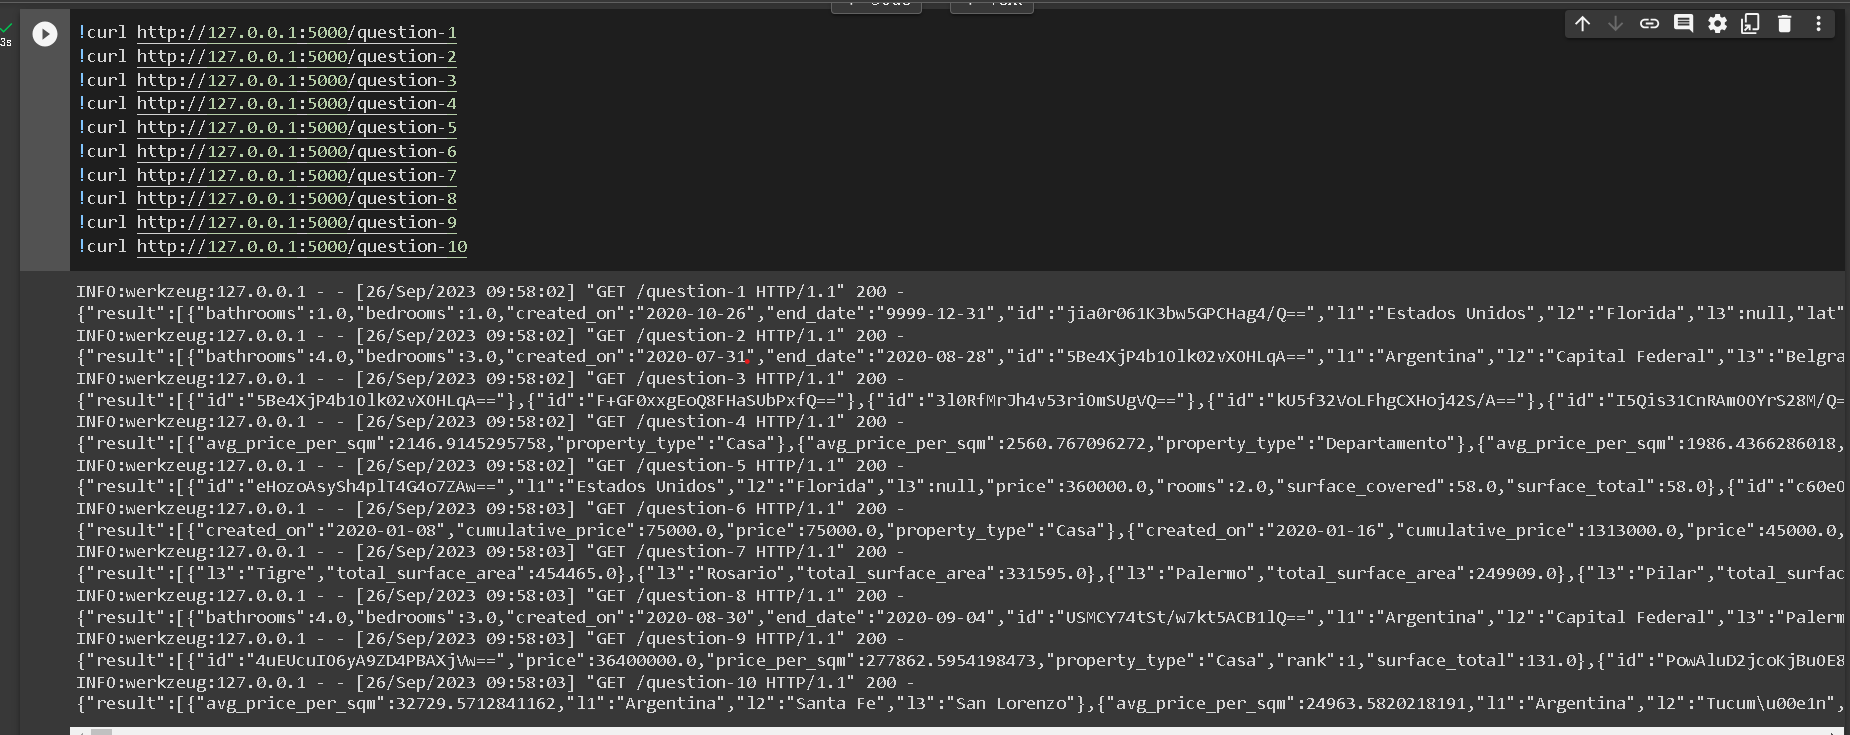

## Ngrok server screenshots

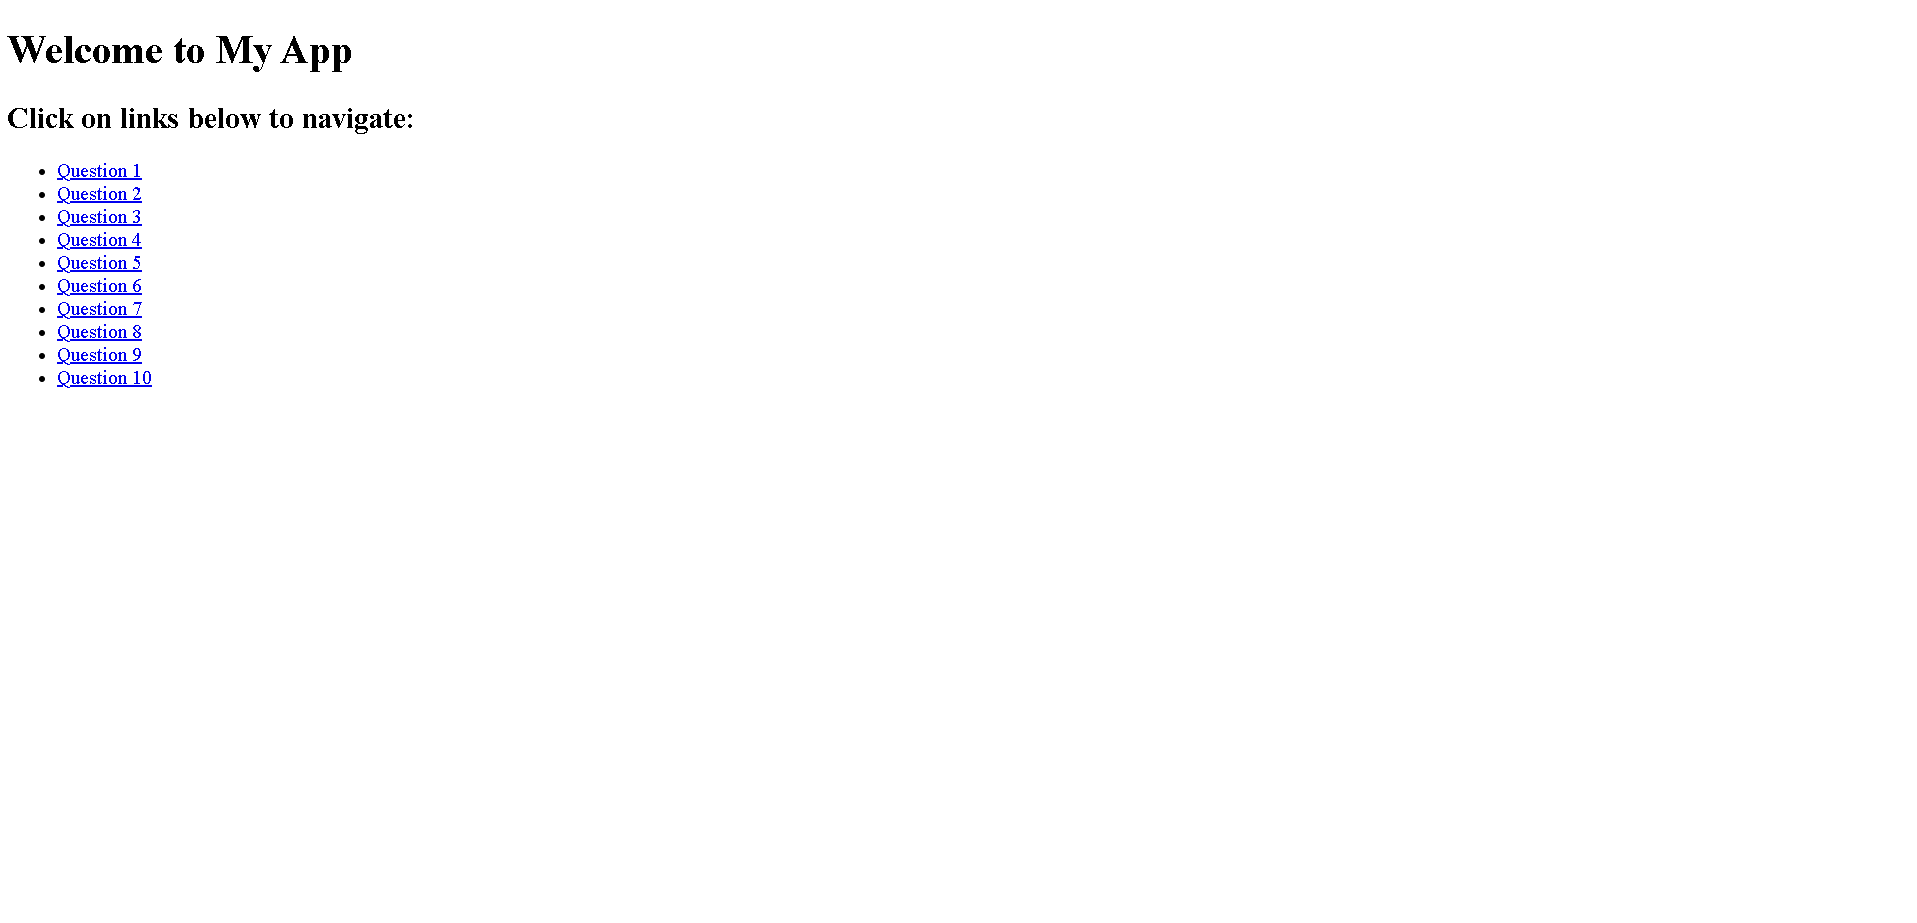
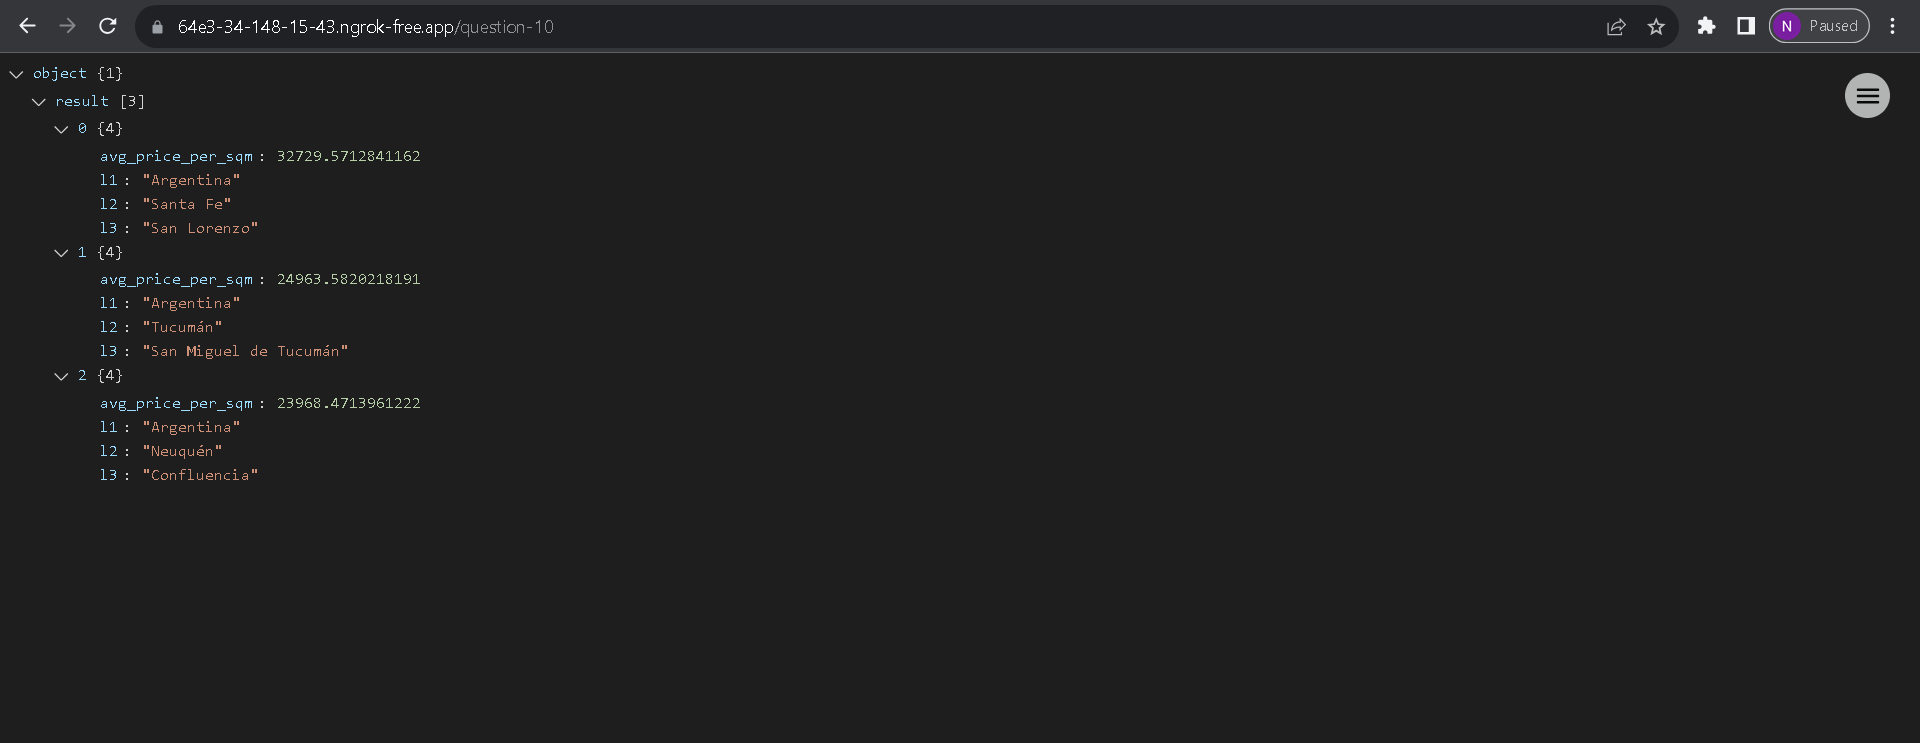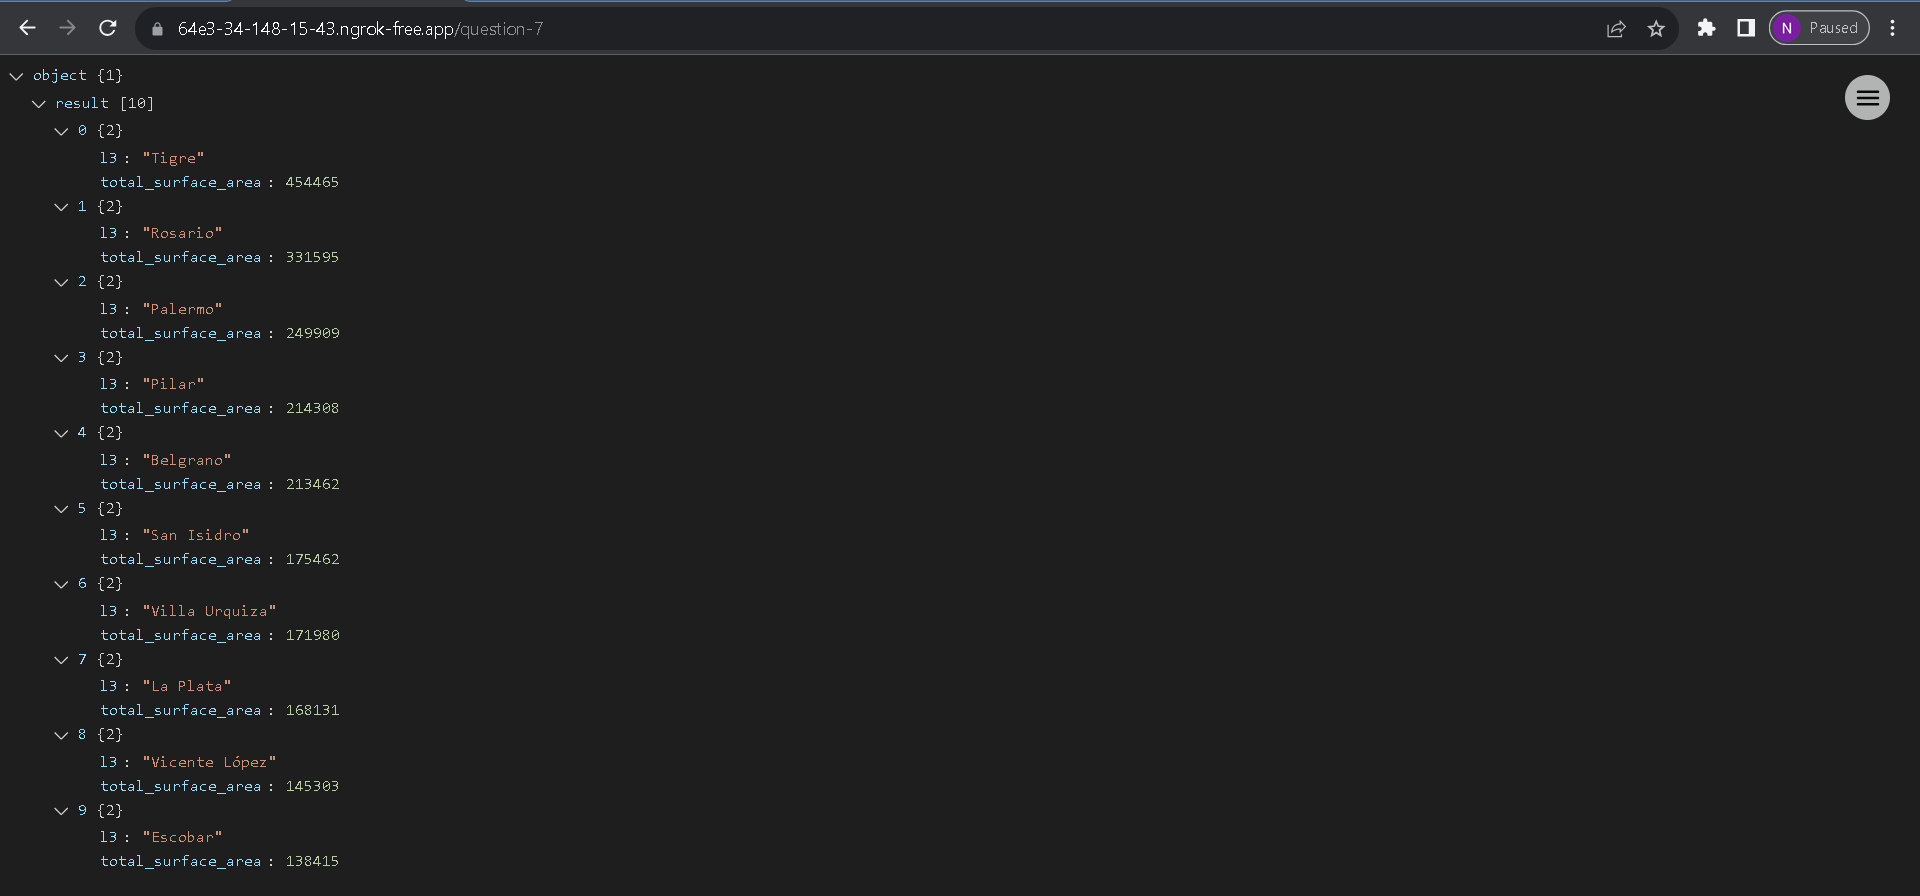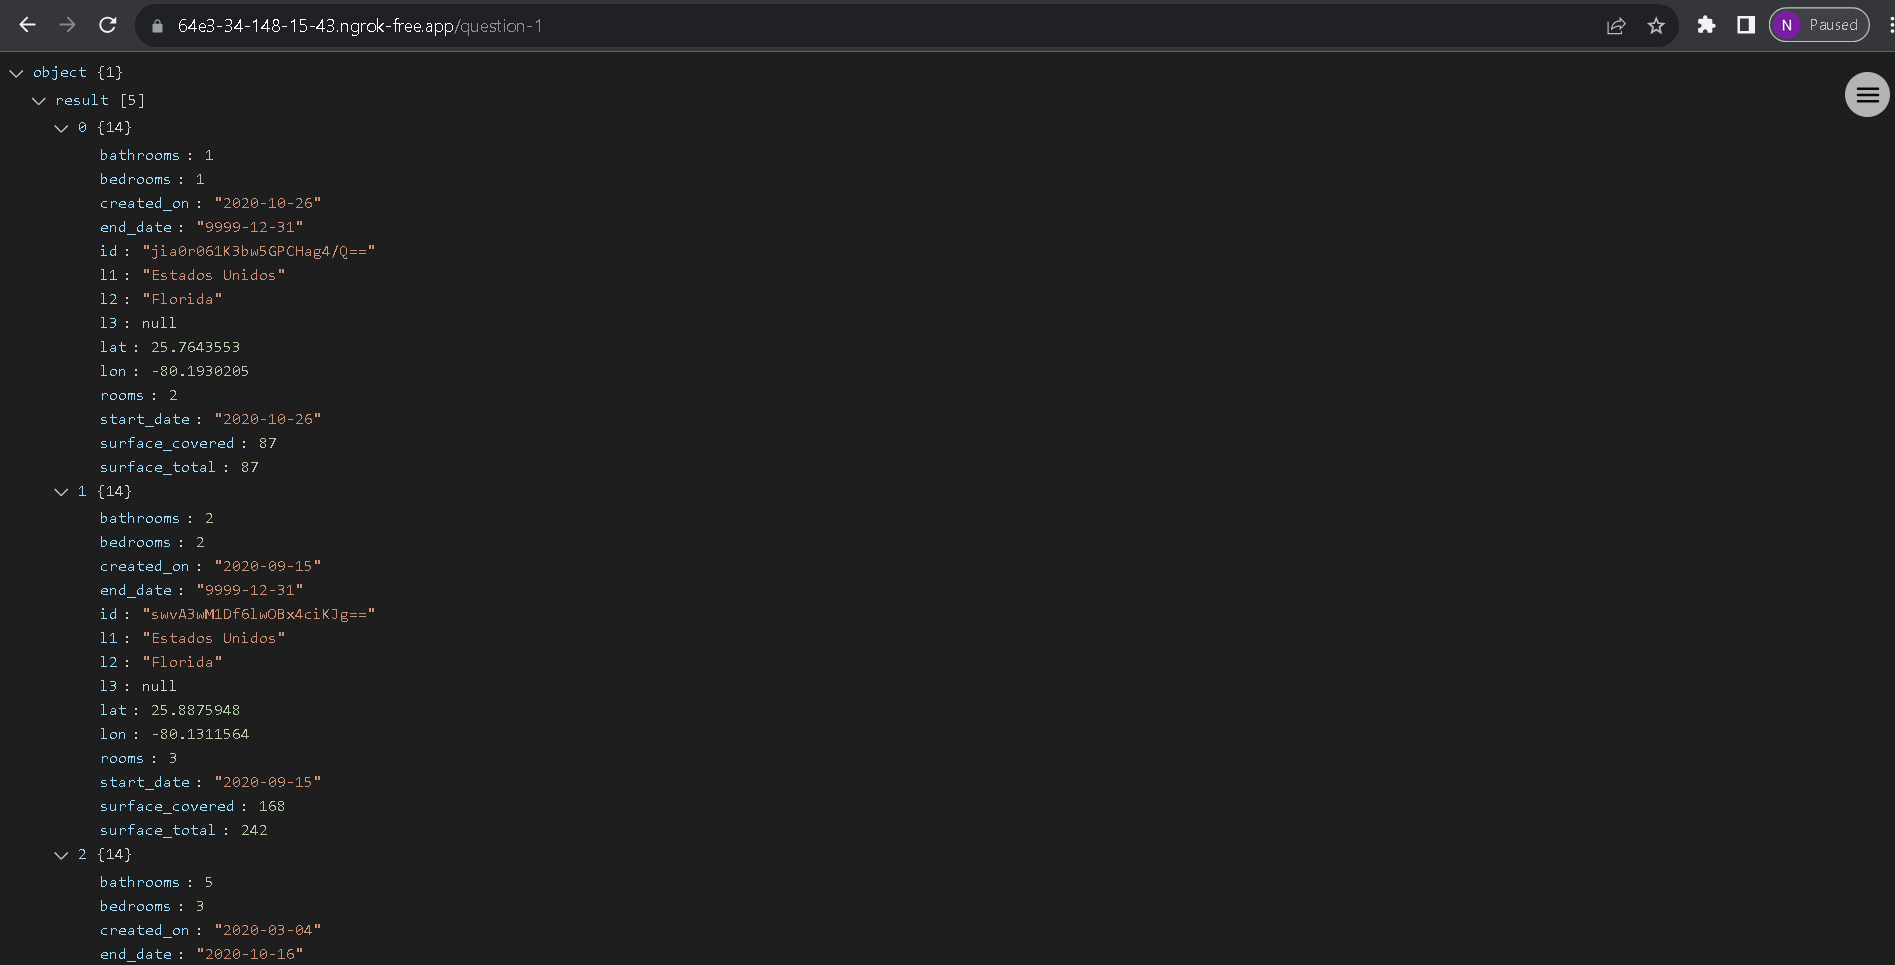